In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import jinja2
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [20]:
df = pd.read_csv('Organics.xlsx - Organics.csv')
df.head()

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               22223 non-null  int64  
 1   DemAffl          21138 non-null  float64
 2   DemAge           20715 non-null  float64
 3   DemCluster       21549 non-null  float64
 4   DemClusterGroup  21549 non-null  object 
 5   DemGender        19711 non-null  object 
 6   DemReg           21758 non-null  object 
 7   DemTVReg         21758 non-null  object 
 8   PromClass        22223 non-null  object 
 9   PromSpend        22223 non-null  float64
 10  PromTime         21942 non-null  float64
 11  TargetBuy        22223 non-null  int64  
 12  TargetAmt        22223 non-null  int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB


In [22]:
df1 = df.drop(['ID'],axis=1)
df1.head()

,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0


In [23]:
df1.shape

(22223, 12)

In [24]:
df1.isnull().sum()

DemAffl            1085
DemAge             1508
DemCluster          674
DemClusterGroup     674
DemGender          2512
DemReg              465
DemTVReg            465
PromClass             0
PromSpend             0
PromTime            281
TargetBuy             0
TargetAmt             0
dtype: int64

In [25]:
numerical = [var for var in df1.columns if df1[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
if len(numerical)>1:
    print('The numerical variables :', numerical)

There are 7 numerical variables

The numerical variables : ['DemAffl', 'DemAge', 'DemCluster', 'PromSpend', 'PromTime', 'TargetBuy', 'TargetAmt']


In [26]:
categorical = [var for var in df1.columns if df1[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
if len(categorical)>1:
    print('The categorical variables :', categorical)

There are 5 categorical variables

The categorical variables : ['DemClusterGroup', 'DemGender', 'DemReg', 'DemTVReg', 'PromClass']


In [27]:
df1[numerical].nunique()

DemAffl         33
DemAge          62
DemCluster      55
PromSpend     2606
PromTime        39
TargetBuy        2
TargetAmt        4
dtype: int64

In [28]:
df1[numerical].isnull().sum()

DemAffl       1085
DemAge        1508
DemCluster     674
PromSpend        0
PromTime       281
TargetBuy        0
TargetAmt        0
dtype: int64

array([[<AxesSubplot: title={'center': 'DemAffl'}>,
        <AxesSubplot: title={'center': 'DemAge'}>,
        <AxesSubplot: title={'center': 'DemCluster'}>],
       [<AxesSubplot: title={'center': 'PromSpend'}>,
        <AxesSubplot: title={'center': 'PromTime'}>,
        <AxesSubplot: title={'center': 'TargetBuy'}>],
       [<AxesSubplot: title={'center': 'TargetAmt'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

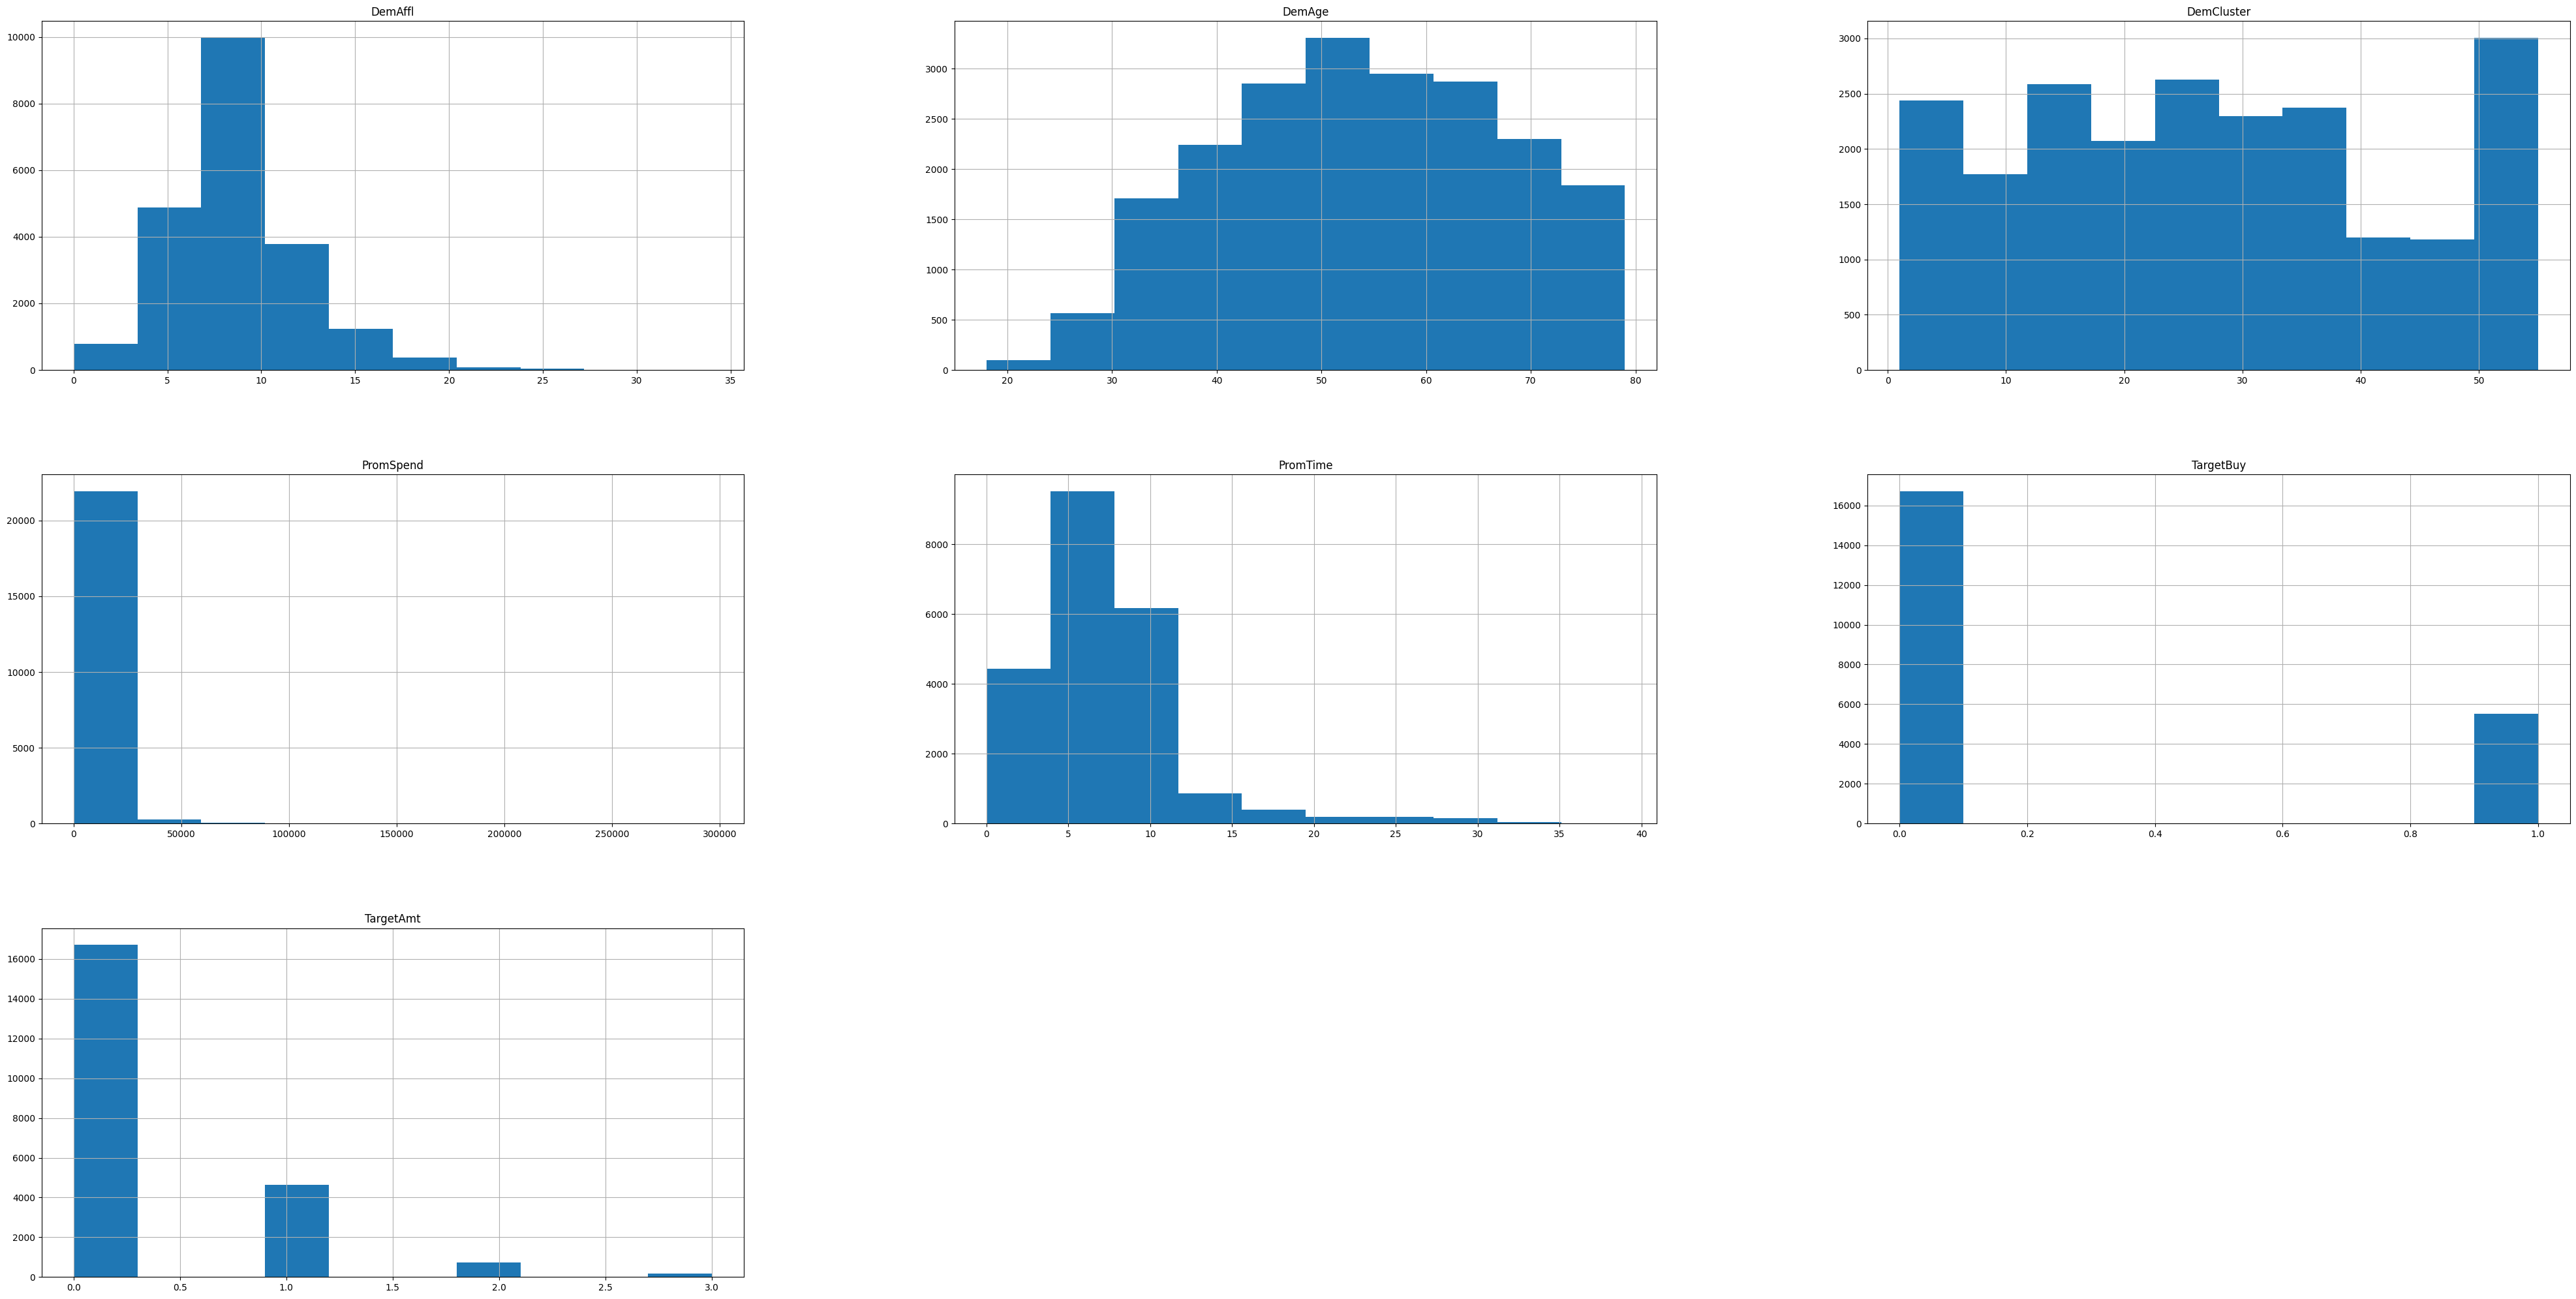

In [29]:
df1[numerical].hist(figsize=(50,25))

In [30]:
df1['DemAffl']=df1['DemAffl'].fillna(df1['DemAffl'].mean())
df1['DemAge']=df1['DemAge'].fillna(df1['DemAge'].mean())
df1['DemCluster']=df1['DemCluster'].fillna(df1['DemCluster'].mean())
df1['PromTime']=df1['PromTime'].fillna(df1['PromTime'].median())

In [31]:
df1[numerical].isnull().sum()

DemAffl       0
DemAge        0
DemCluster    0
PromSpend     0
PromTime      0
TargetBuy     0
TargetAmt     0
dtype: int64

In [32]:
df1[categorical].isnull().sum()

DemClusterGroup     674
DemGender          2512
DemReg              465
DemTVReg            465
PromClass             0
dtype: int64

In [33]:
df1[categorical]=df1[categorical].fillna(df1[categorical].mode().iloc[0])

In [34]:
df1[categorical].isnull().sum()

DemClusterGroup    0
DemGender          0
DemReg             0
DemTVReg           0
PromClass          0
dtype: int64

In [35]:
df1.isnull().values.any()

False

In [42]:
#Using the InterQuartile Range to fill the values
def remove_outlier(i , col):
    Q1 = i[col].quantile(0.25)
    Q3 = i[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df1[col] = np.clip(i[col] , lower_whisker , upper_whisker)
    return i

def treat_outliers_all(df , col_list):
    for c in col_list:
        i = remove_outlier(df , c)
    return i

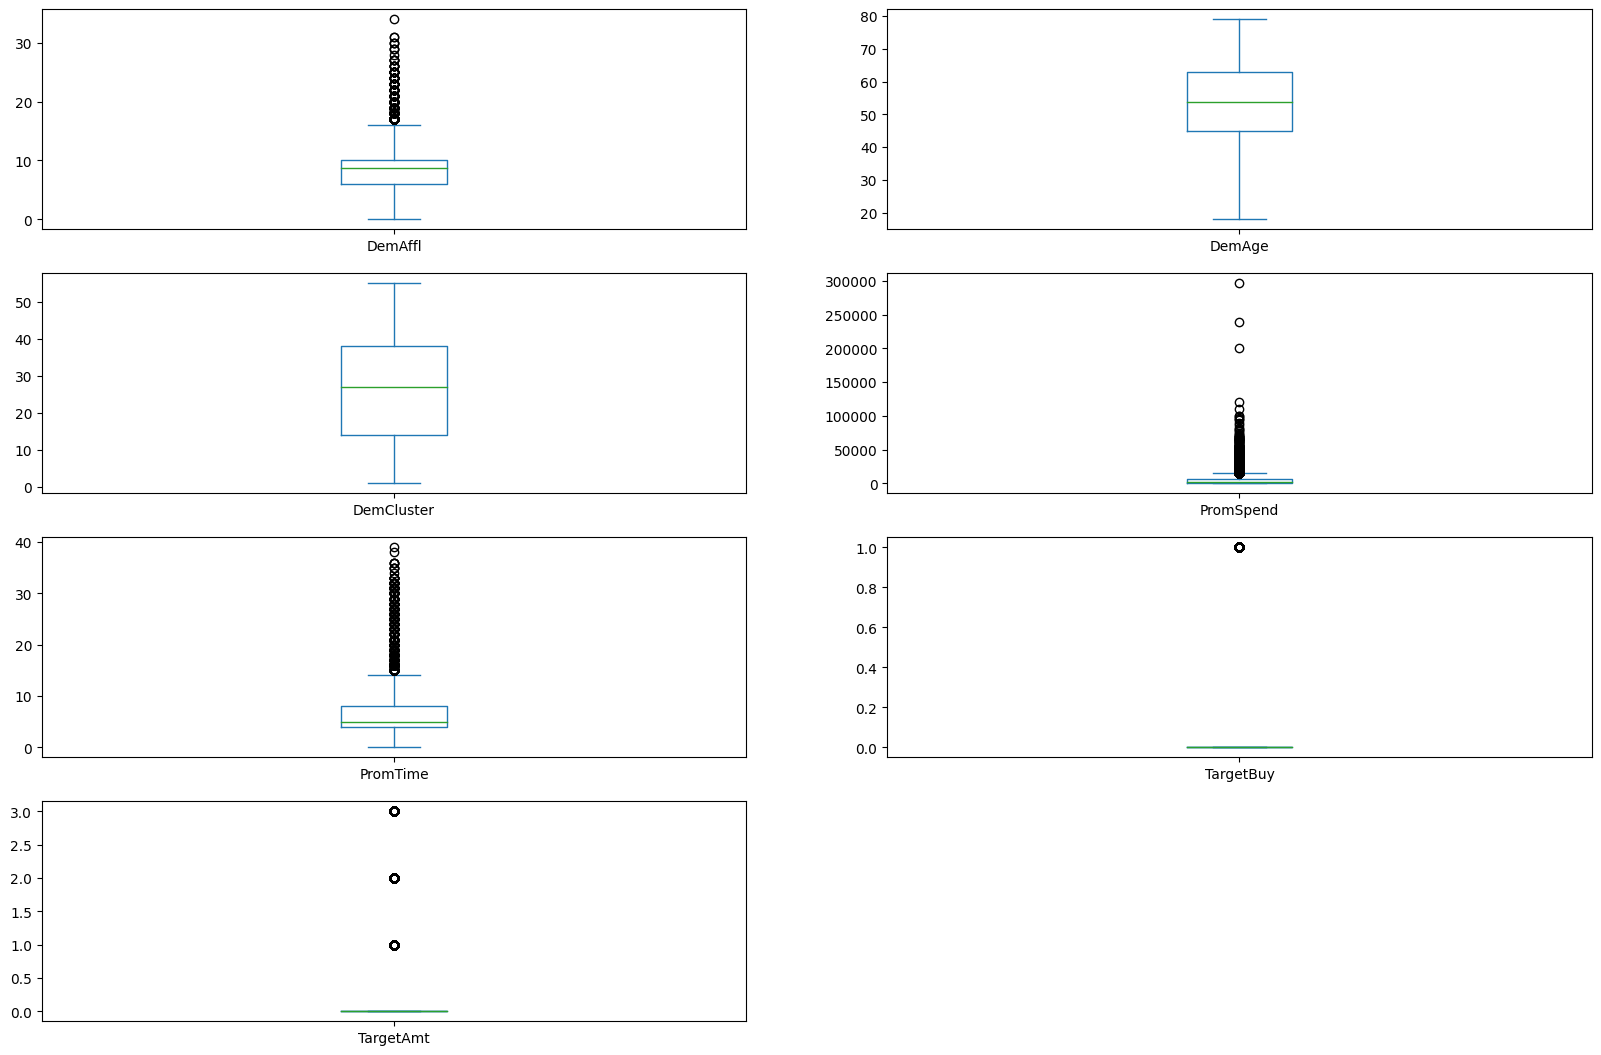

In [39]:
df1[numerical].plot(kind = "box",subplots = True,layout = (6,2),figsize=(20,20)) #Boxplot to check the outliers
plt.show()

In [40]:
numerical

['DemAffl',
 'DemAge',
 'DemCluster',
 'PromSpend',
 'PromTime',
 'TargetBuy',
 'TargetAmt']

In [41]:
rem_list = ['DemAffl',
 'DemAge',
 'DemCluster',
 'PromSpend',
 'PromTime']

In [43]:
df2 = treat_outliers_all(df1 , rem_list)

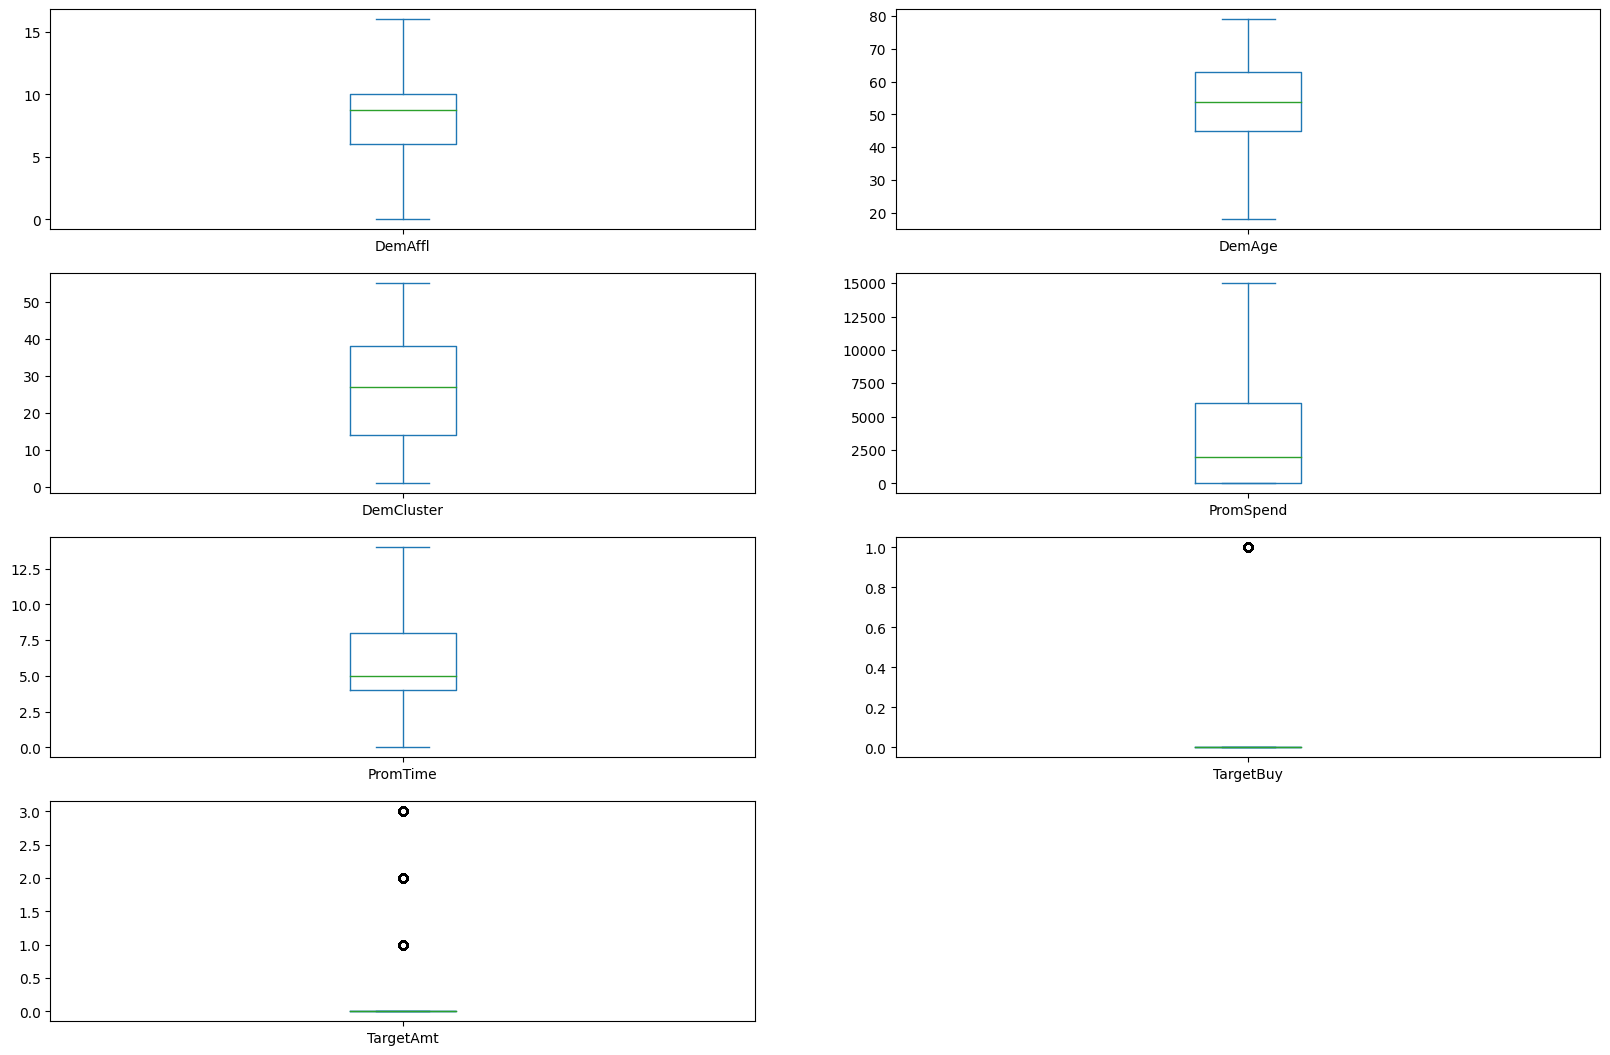

In [44]:
df2[numerical].plot(kind = "box",subplots = True,layout = (6,2),figsize=(20,20)) #Boxplot to check the outliers
plt.show()

In [50]:
df2[categorical].nunique()

DemClusterGroup     7
DemGender           3
DemReg              5
DemTVReg           13
PromClass           4
dtype: int64

In [51]:
df2.head()

,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,14999.985,4.0,0,0
1,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.000,5.0,0,0
2,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.020,8.0,1,1
3,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.010,7.0,1,1
4,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.010,8.0,0,0


In [52]:
11*11

121

In [53]:
df3 = pd.get_dummies(data=df2,columns=categorical,drop_first=True)
df3.shape

(22223, 34)

In [55]:
X = df3.drop(['TargetBuy'],axis=1)
y = df3.TargetBuy

X.shape, y.shape

((22223, 33), (22223,))

In [56]:
y.value_counts()

0    16718
1     5505
Name: TargetBuy, dtype: int64

smote because there is huge imbalance

In [57]:
from imblearn.over_sampling import SMOTE

In [58]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [59]:
y.value_counts()

0    16718
1    16718
Name: TargetBuy, dtype: int64

In [60]:
# create X and Y datasets for training
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26748, 33), (6688, 33), (26748,), (6688,))

In [61]:
from sklearn.preprocessing import MinMaxScaler

cols = X_train.columns
scaler = MinMaxScaler()
X_train_RF = scaler.fit_transform(X_train)
X_test_RF = scaler.transform(X_test)

X_train_RF = pd.DataFrame(X_train_RF,columns=cols)
X_test_RF = pd.DataFrame(X_test_RF,columns=cols)

In [62]:
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train_RF, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [63]:
print('Training set score: {:.4f}'.format(logreg.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test_RF, y_test)))

Training set score: 1.0000
Test set score: 1.0000


In [64]:
y_pred = logreg.predict(X_test_RF)

In [65]:
log_accuracy = logreg.score(X_test_RF, y_test)
log_accuracy

1.0

In [66]:
# precision
log_pre = precision_score(y_test, y_pred)
log_pre

1.0

In [67]:
# recall
log_rec = recall_score(y_test, y_pred)
log_rec

1.0

KNN

In [68]:
from math import sqrt
print(sqrt(X_train.shape[1]))

5.744562646538029


In [69]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,10)
#20 because sqrt of len(X_train)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

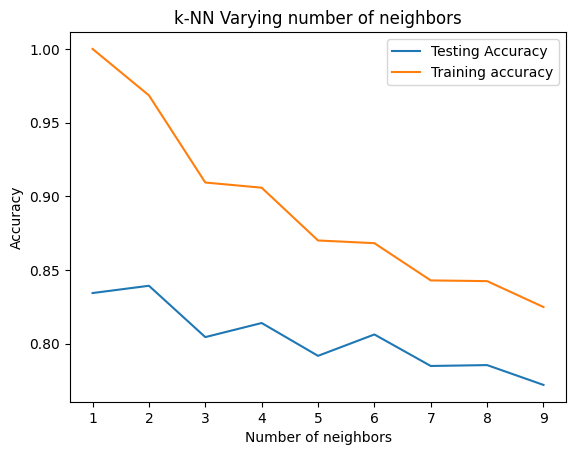

In [70]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [71]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,10)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,verbose=1,cv=6)
knn_cv.fit(X_train,y_train)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Fitting 6 folds for each of 9 candidates, totalling 54 fits
Best Score:0.8328847016599372
Best Parameters: {'n_neighbors': 1}


In [72]:
print('Training set score: {:.4f}'.format(knn_cv.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn_cv.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.8343


In [73]:
knn_accuracy = knn_cv.score(X_test, y_test)
knn_accuracy

0.8343301435406698

In [74]:
# precision
knn_pre = precision_score(y_test, y_pred)
knn_pre

1.0

In [75]:
# recall
knn_rec = recall_score(y_test, y_pred)
knn_rec

1.0

Random Forests

In [76]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc = RandomForestClassifier(random_state=12,n_estimators=10)

# fit the model
rfc.fit(X_train_RF, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test_RF)

# Check accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 1.0000


In [77]:
print('Training set score: {:.4f}'.format(rfc.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(rfc.score(X_test_RF, y_test)))

Training set score: 1.0000
Test set score: 1.0000


In [78]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc_100 = RandomForestClassifier(random_state=12,n_estimators=100)

# fit the model
rfc_100.fit(X_train_RF, y_train)

# Predict the Test set results
y_pred = rfc_100.predict(X_test_RF)

# Check accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 100 decision-trees : 1.0000


In [79]:
print('Training set score: {:.4f}'.format(rfc_100.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(rfc_100.score(X_test_RF, y_test)))

Training set score: 1.0000
Test set score: 1.0000


In [80]:
rfc_100.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 12,
 'verbose': 0,
 'warm_start': False}

In [81]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(15,50))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

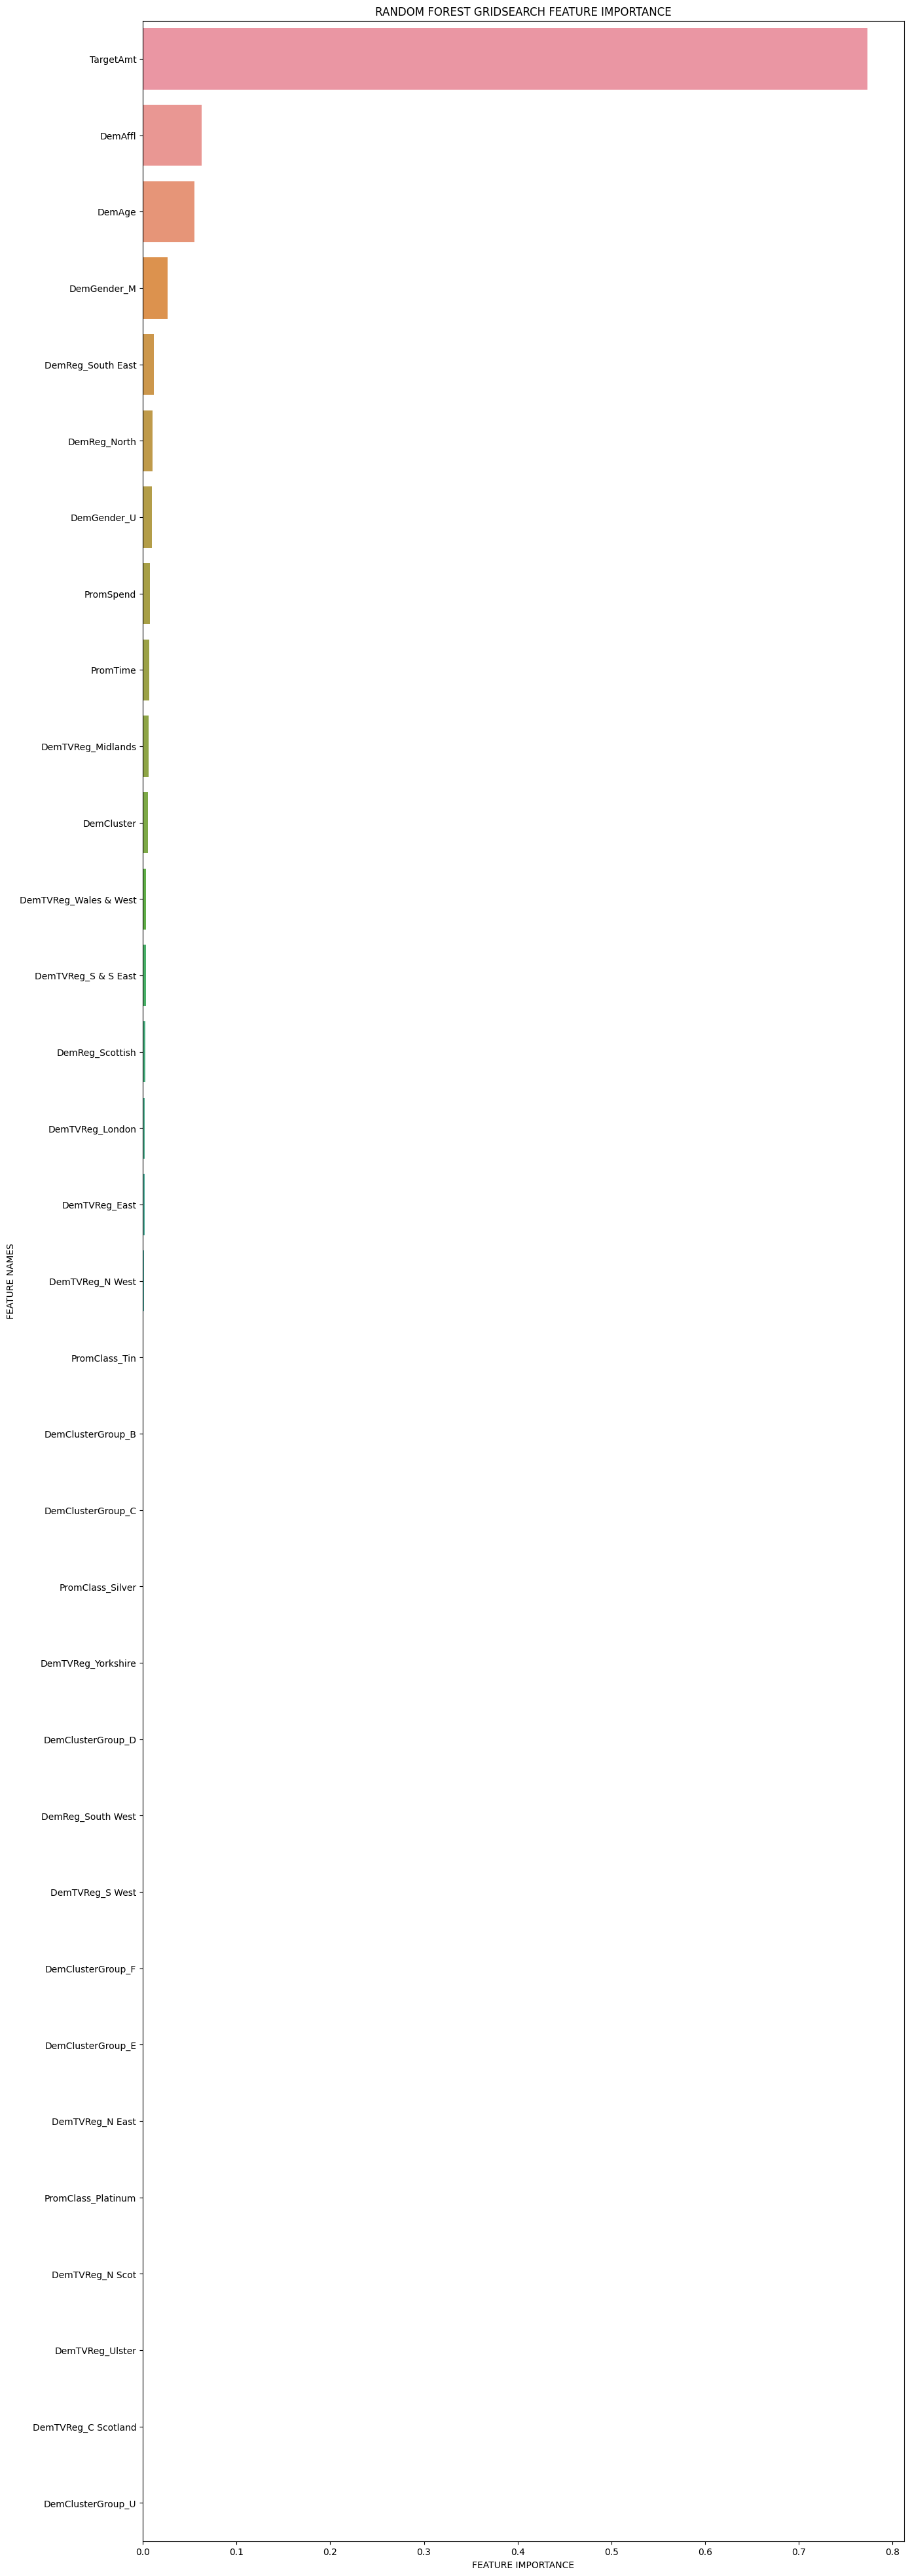

In [82]:
plot_feature_importance(rfc.feature_importances_,X_train_RF.columns,'RANDOM FOREST GRIDSEARCH ')

In [83]:
rfcv_accuracy = rfc_100.score(X_test_RF, y_test)
rfcv_accuracy

1.0

In [84]:
# precision
rfcv_pre = precision_score(y_test, y_pred)
rfcv_pre

1.0

In [85]:
# recall
rfcv_rec = recall_score(y_test, y_pred)
rfcv_rec

1.0

CNN

In [86]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
# Importing libraries for building the neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold, train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf

In [87]:
Organics_model = Sequential()
Organics_model.add(Dense(256, input_shape = (X_train_RF.shape[1],), activation = "relu"))
Organics_model.add(Dense(512, activation = "relu"))
Organics_model.add(Dense(1024, activation = "relu"))
Organics_model.add(Dropout(0.2))
Organics_model.add(Dense(1024, activation = "relu"))
Organics_model.add(Dense(512, activation = "relu"))
Organics_model.add(Dense(256, activation = "relu"))
Organics_model.add(Flatten())
Organics_model.add(Dense(512, activation = "relu"))
Organics_model.add(Dropout(0.5))
Organics_model.add(Dense(512, activation = "relu"))
Organics_model.add(Dropout(0.5))
# Organics_model.add(Dense(1, activation = "sigmoid",kernel_regularizer = "binary_crossentropy"))
Organics_model.add(Dense(1, activation = "sigmoid"))
Organics_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               8704      
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dense_5 (Dense)             (None, 256)               1

In [88]:
optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
losses = tf.keras.losses.binary_crossentropy
Organics_model.compile(optimizer=optimizer, loss=losses, metrics=['accuracy'])

In [89]:
m_loss = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [90]:
save_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='organics_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

In [91]:
history=Organics_model.fit(X_train_RF, y_train, epochs=100,validation_split=0.2, batch_size=64, verbose=1,callbacks=[m_loss,save_checkpoint])

Epoch 1/100


c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1508: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


330/335 [============================>.] - ETA: 0s - loss: 0.0500 - accuracy: 0.9766
Epoch 1: val_accuracy improved from -inf to 0.99925, saving model to organics_model.h5
335/335 [==============================] - 4s 5ms/step - loss: 0.0493 - accuracy: 0.9769 - val_loss: 0.0021 - val_accuracy: 0.9993
Epoch 2/100
324/335 [============================>.] - ETA: 0s - loss: 5.5179e-05 - accuracy: 1.0000
Epoch 2: val_accuracy improved from 0.99925 to 1.00000, saving model to organics_model.h5
335/335 [==============================] - 1s 4ms/step - loss: 5.3484e-05 - accuracy: 1.0000 - val_loss: 1.6060e-08 - val_accuracy: 1.0000
Epoch 3/100
318/335 [===========================>..] - ETA: 0s - loss: 3.6333e-07 - accuracy: 1.0000
Epoch 3: val_accuracy did not improve from 1.00000
335/335 [==============================] - 1s 3ms/step - loss: 3.5254e-07 - accuracy: 1.0000 - val_loss: 9.5876e-09 - val_accuracy: 1.0000
Epoch 4/100
333/335 [============================>.] - ETA: 0s - loss: 2.804

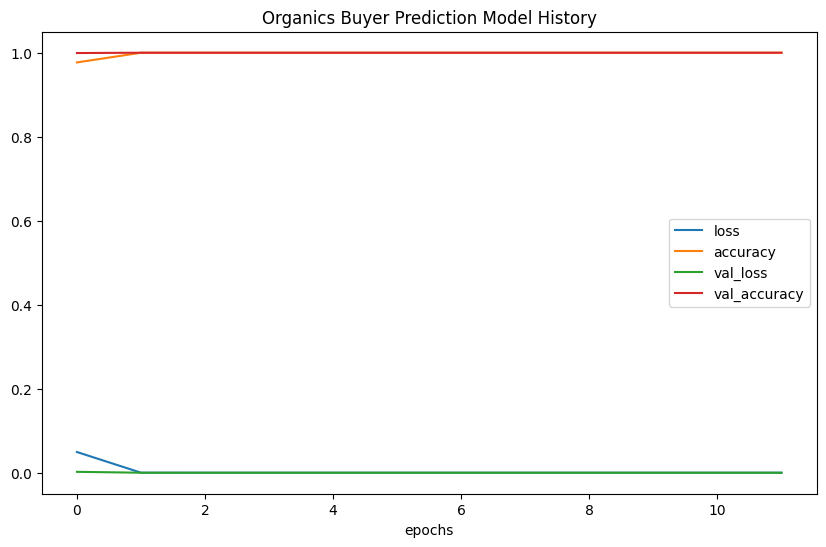

In [92]:
dfh = pd.DataFrame(history.history)
plt.figure(figsize=(10, 6))
plt.title('Organics Buyer Prediction Model History')
plt.plot(dfh)
plt.xlabel('epochs')
plt.legend(dfh.columns)
plt.show()

In [93]:
print("Evaluate Organics_model against trained data")
score = Organics_model.evaluate(X_train_RF, y_train, verbose=0)
print("score %s: %.2f%%" % (Organics_model.metrics_names[1], score[1]*100))

print("Evaluate Organics_model against test data")
score = Organics_model.evaluate(X_test_RF, y_test, verbose=0)
print("score %s: %.2f%%" % (Organics_model.metrics_names[1], score[1]*100))

Evaluate Organics_model against trained data
score accuracy: 100.00%
Evaluate Organics_model against test data
score accuracy: 100.00%


In [94]:
y_pred = Organics_model.predict(X_test_RF)

209/209 [==============================] - 0s 2ms/step


In [95]:
# extract the predicted probabilities
p_pred = Organics_model.predict(X_test_RF)
p_pred = p_pred.flatten()
print(p_pred.round(2))

209/209 [==============================] - 0s 2ms/step
[0. 1. 0. ... 1. 1. 0.]


In [96]:
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

[0 1 0 ... 1 1 0]


In [97]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[3378,    0],
       [   0, 3310]], dtype=int64)

In [98]:
cnn_accuracy = accuracy_score(y_test,y_pred)
cnn_accuracy

1.0

In [99]:
# precision
cnn_pre = precision_score(y_test, y_pred)
cnn_pre

1.0

In [100]:
# recall
cnn_rec = recall_score(y_test, y_pred)
cnn_rec

1.0

In [101]:
# creating performance dictionary
performance = {'Accuracy_Score':[log_accuracy, knn_accuracy, rfcv_accuracy, cnn_accuracy],
              'Precision':[log_pre, knn_pre, rfcv_pre, cnn_pre],
              'Recall': [log_rec, knn_rec, rfcv_rec, cnn_rec]}

In [102]:
performance_df = pd.DataFrame(data = performance, index= ['Logistic Regression', 'KNeighbors', 
                                                             'RandomForest Gridsearch',
                                                                'ANN'])

In [103]:
performance_df

,Accuracy_Score,Precision,Recall
Logistic Regression,1.00000,1.0,1.0
KNeighbors,0.83433,1.0,1.0
RandomForest Gridsearch,1.00000,1.0,1.0
ANN,1.00000,1.0,1.0
